# Minimum working example

This is a simple minimum working example to get started, along the lines of the one given in https://emg3d.readthedocs.io/en/stable/usage.html#example.

To see some more realistic models have a look at the other notebooks in this repo.

First, we load `emg3d` and `discretize` (to create a mesh), along with `numpy` and `matplotlib`:

In [1]:
import emg3d
import discretize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
%matplotlib notebook
plt.style.use('ggplot')

### 1. Mesh

First, we define the mesh (see `discretize.TensorMesh` for more info). In reality, this task requires some careful considerations. E.g., to avoid edge effects, the mesh should be large enough in order for the fields to dissipate, yet fine enough around source and receiver to accurately model them. This grid is too small, but serves as a minimal example.

In [3]:
grid = discretize.TensorMesh(
        [[(25, 10, -1.04), (25, 28), (25, 10, 1.04)],
         [(50, 8, -1.03), (50, 16), (50, 8, 1.03)],
         [(30, 8, -1.05), (30, 16), (30, 8, 1.05)]],
        x0='CCC')
grid

TensorMesh: 49,152 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     48       -662.16        662.16     25.00     37.01    1.04
   y     32       -857.96        857.96     50.00     63.34    1.03
   z     32       -540.80        540.80     30.00     44.32    1.05

### 2. Model

Next we define a very simple fullspace model with $\rho_𝑥=1.5\,\Omega\rm{m}$,  $\rho_y=1.8\,\Omega\rm{m}$, and  $\rho_z=3.3\,\Omega\rm{m}$.

In [4]:
freq = 10.0  # Hz
model = emg3d.utils.Model(grid, res_x=1.5, res_y=1.8, res_z=3.3, freq=freq)

We can plot the model using `discretize`; in this case it is obviously rather a boring plot, as it shows a homogenous fullspace. 

<IPython.core.display.Javascript object>


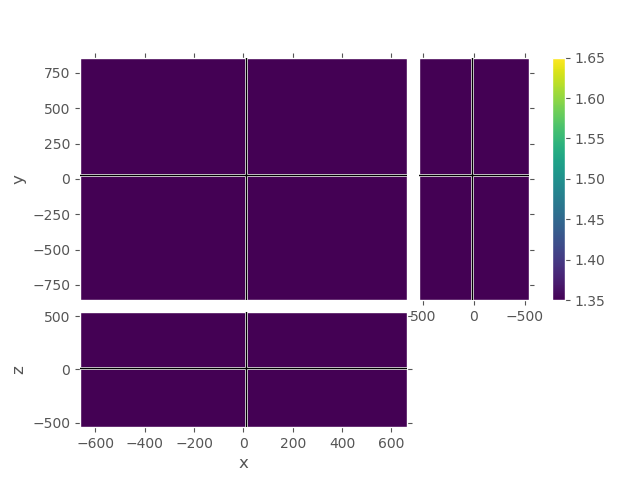

In [5]:
grid.plot_3d_slicer(model.res_x)  # x-resistivity

### 3. Source field

The source is an x-directed dipole at the origin, with a 10 Hz signal of 1 A (`src` is defined either as `[x, y, z, dip, azimuth]` or `[x0, x1, y0, y1, z0, z1]`; the strength can be set via the `strength` parameter).

In [6]:
sfield = emg3d.utils.get_source_field(grid, src=[0, 0, 0, 0, 0], freq=freq)

### 4. Calculate the electric field

Now we can calculate the electric field with `emg3d`:

In [7]:
efield = emg3d.solver.solver(grid, model, sfield, verb=3)


:: emg3d START :: 09:42:30 ::

   MG-cycle       : 'F'                 sslsolver : False
   semicoarsening : False [0]           tol       : 1e-06
   linerelaxation : False [0]           maxit     : 50
   nu_{i,1,c,2}   : 0, 2, 1, 2          verb      : 3
   Original grid  :  48 x  32 x  32     => 49,152 cells
   Coarsest grid  :   3 x   2 x   2     => 12 cells
   Coarsest level :   4 ;   4 ;   4   

   [hh:mm:ss]     error                 l2:[last/init, last/prev] l s

       h_
      2h_ \                  /
      4h_  \          /\    / 
      8h_   \    /\  /  \  /  
     16h_    \/\/  \/    \/   

   [09:42:30] 1.464e-06 after  1 F-cycles; [2.623e-02, 2.623e-02] 0 0
   [09:42:31] 1.258e-07 after  2 F-cycles; [2.253e-03, 8.589e-02] 0 0
   [09:42:31] 1.704e-08 after  3 F-cycles; [3.051e-04, 1.354e-01] 0 0
   [09:42:31] 3.071e-09 after  4 F-cycles; [5.500e-05, 1.803e-01] 0 0
   [09:42:31] 6.531e-10 after  5 F-cycles; [1.170e-05, 2.127e-01] 0 0
   [09:42:32] 1.532e-10 after  6 F-cycl

The calculation requires in this case seven multigrid F-cycles and taken just a few seconds. It was able to coarsen in each dimension four times, where the input grid had 49,152 cells, and the coarsest grid had 12 cells.

### 5. Plot the result

We can again utilize the in-built functions of a `discretize`-grid to plot, e.g., the x-directed electric field.

<IPython.core.display.Javascript object>


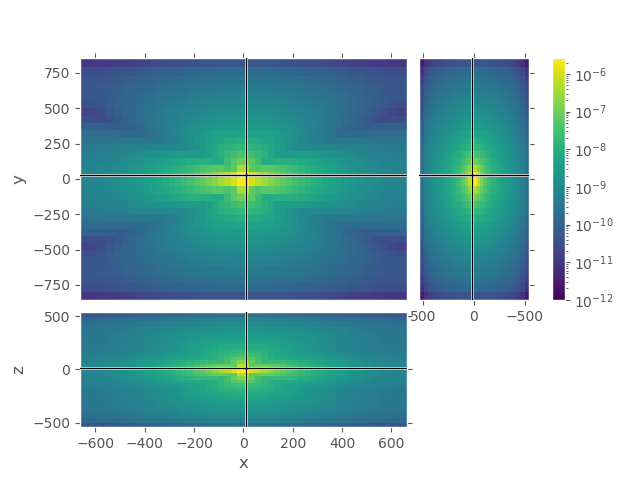

In [8]:
grid.plot_3d_slicer(efield.fx.ravel('F'), view='abs', vType='Ex', pcolorOpts={'norm': LogNorm()})

In [9]:
emg3d.Versions(discretize, 5)

------------------------------------------------------
  Fri Jun 28 09:42:33 2019 CEST

          Linux : OS
              4 : CPU(s)
         1.16.4 : numpy
          1.2.1 : scipy
         0.44.1 : numba
      0.6.3dev0 : emg3d
          7.5.0 : IPython
          3.1.0 : matplotlib
          0.4.4 : discretize

  3.7.3 (default, Mar 27 2019, 22:11:17)  [GCC
  7.3.0]
------------------------------------------------------